# Setup

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download rogeriovaz/rome-weather-classification

100% 2.34M/2.34M [00:00<00:00, 4.42MB/s]
100% 2.34M/2.34M [00:00<00:00, 3.80MB/s]


In [ ]:
! unzip /content/rome-weather-classification.zip

Archive:  /content/rome-weather-classification.zip
  inflating: Rome Weather/Cloudy/download (1).jpg  
  inflating: Rome Weather/Cloudy/download (10).jpg  
  inflating: Rome Weather/Cloudy/download (2).jpg  
  inflating: Rome Weather/Cloudy/download (3).jpg  
  inflating: Rome Weather/Cloudy/download (4).jpg  
  inflating: Rome Weather/Cloudy/download (5).jpg  
  inflating: Rome Weather/Cloudy/download (6).jpg  
  inflating: Rome Weather/Cloudy/download.jpg  
  inflating: Rome Weather/Cloudy/images (1).jpg  
  inflating: Rome Weather/Cloudy/images (10).jpg  
  inflating: Rome Weather/Cloudy/images (11).jpg  
  inflating: Rome Weather/Cloudy/images (12).jpg  
  inflating: Rome Weather/Cloudy/images (13).jpg  
  inflating: Rome Weather/Cloudy/images (14).jpg  
  inflating: Rome Weather/Cloudy/images (15).jpg  
  inflating: Rome Weather/Cloudy/images (16).jpg  
  inflating: Rome Weather/Cloudy/images (17).jpg  
  inflating: Rome Weather/Cloudy/images (18).jpg  
  inflating: Rome Weather/C

# Data Processing

In [ ]:
import albumentations as A
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [ ]:
train_dir = r"/content/Rome Weather/"

datagen = ImageDataGenerator(rescale = 1./255,
                             rotation_range=30,
                             fill_mode='nearest',
                             horizontal_flip=True,
                             brightness_range=[0.4,1.5], # values less then 1 darken the image and greater than 1 brighten.
                             validation_split=0.2)

train_datagen = datagen.flow_from_directory(
    train_dir,
    batch_size = 32,
    class_mode = "categorical",
    target_size = (150,150),
    subset = "training"
)

val_datagen = datagen.flow_from_directory(
    train_dir,
    batch_size = 32,
    class_mode = "categorical",
    target_size = (150,150),
    subset = "validation"
)

Found 200 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


(32, 150, 150, 3)


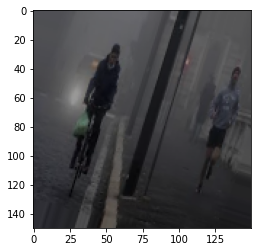

(32, 150, 150, 3)


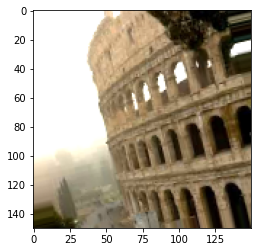

(32, 150, 150, 3)


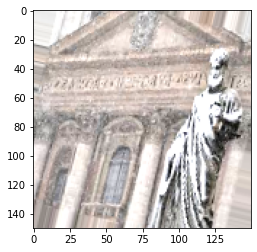

(8, 150, 150, 3)


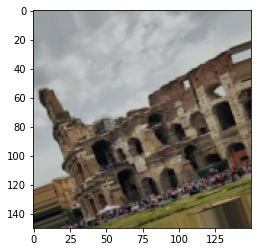

(32, 150, 150, 3)


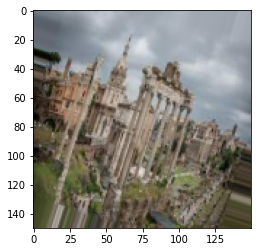

In [ ]:
for _ in range(5):
    img, label = train_datagen.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

# Baseline Model

In [ ]:
from tensorflow import keras
from keras import Model, layers

from keras.utils.vis_utils import plot_model


from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
def baseline_model(input_shape, model_name):
    inputs = keras.Input(shape = input_shape, name = "Input_Layer")
    x = Conv2D(filters = 64, kernel_size = 3, activation = "relu", name = "Conv2D_Block_1_1")(inputs)
    x = Conv2D(filters = 64, kernel_size = 3, activation = "relu", name = "Conv2D_Block_1_2")(x)
    x = MaxPooling2D(pool_size = 2, padding = "same", name = "MaxPoolingLayer")(x)
    x = Dropout(0.5, name = "DropoutLayer_1")(x)
    x = Flatten()(x)
    x = Dense(128, activation = "relu", name = "FullyConnected_1")(x)
    x = Dense(128, activation = "relu", name = "FullyConnected_2")(x)
    x = Dropout(0.5, name = "DropoutLayer_2")(x)
    outputs = Dense(5, activation = "softmax", name = "OutputLayer")(x)

    model = Model(inputs = inputs, outputs = outputs, name = model_name)

    return model


In [ ]:
baseline_model = baseline_model((150,150,3),"baseline1")

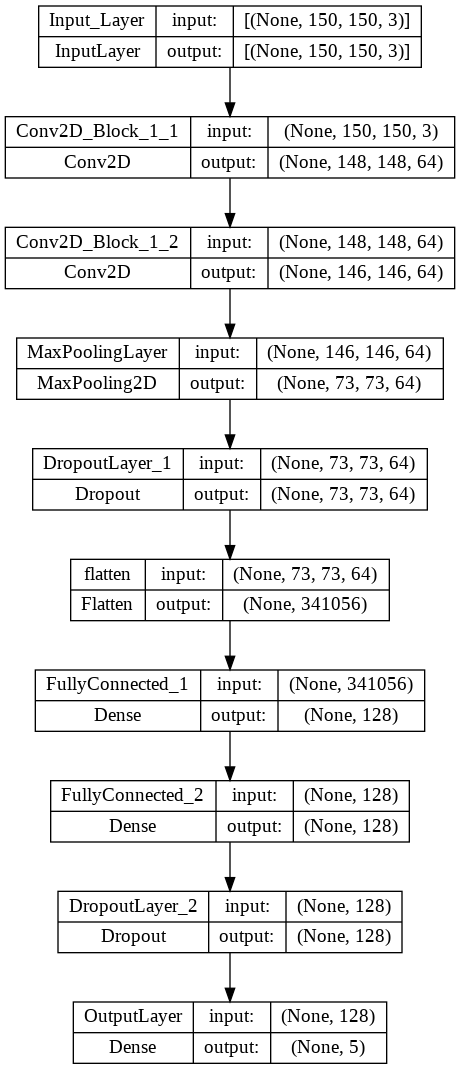

In [ ]:
plot_model(baseline_model,show_shapes=True,show_layer_names=True)

In [ ]:
baseline_model.summary()

Model: "baseline1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 Conv2D_Block_1_1 (Conv2D)   (None, 148, 148, 64)      1792      
                                                                 
 Conv2D_Block_1_2 (Conv2D)   (None, 146, 146, 64)      36928     
                                                                 
 MaxPoolingLayer (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 DropoutLayer_1 (Dropout)    (None, 73, 73, 64)        0         
                                                                 
 flatten (Flatten)           (None, 341056)            0         
                                                         

In [ ]:
baseline_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history=baseline_model.fit(
    train_datagen,
    batch_size=32,
    epochs=25,
    #steps_per_epoch=100,
    verbose=1,
    validation_data=val_datagen
)

Epoch 1/25
7/7 [==============================] - 2s 308ms/step - loss: 1.5867 - accuracy: 0.2450 - val_loss: 1.4761 - val_accuracy: 0.2000
Epoch 2/25
7/7 [==============================] - 2s 273ms/step - loss: 1.4936 - accuracy: 0.2850 - val_loss: 1.3284 - val_accuracy: 0.5000
Epoch 3/25
7/7 [==============================] - 2s 262ms/step - loss: 1.4256 - accuracy: 0.4100 - val_loss: 1.4480 - val_accuracy: 0.3800
Epoch 4/25
7/7 [==============================] - 2s 309ms/step - loss: 1.6448 - accuracy: 0.3400 - val_loss: 1.1709 - val_accuracy: 0.5200
Epoch 5/25
7/7 [==============================] - 2s 265ms/step - loss: 1.3803 - accuracy: 0.4000 - val_loss: 1.1289 - val_accuracy: 0.6600
Epoch 6/25
7/7 [==============================] - 2s 267ms/step - loss: 1.2431 - accuracy: 0.5150 - val_loss: 0.9987 - val_accuracy: 0.6800
Epoch 7/25
7/7 [==============================] - 2s 268ms/step - loss: 1.2517 - accuracy: 0.4850 - val_loss: 0.9343 - val_accuracy: 0.6600
Epoch 8/25
7/7 [====

In [ ]:
def get_plot(trained_model,no_epochs):
    accuracy=trained_model.history['accuracy']
    loss=trained_model.history['loss']
    val_accuracy=trained_model.history['val_accuracy']
    val_loss=trained_model.history['val_loss']
    epochs=[i for i in range(1,no_epochs+1)]

    fig, axs = plt.subplots(1,2, figsize = (15,8))
  
    
    axs[0].plot(epochs,accuracy,'r',label='Training')
    axs[0].plot(epochs,val_accuracy,'--',label='Validation')
    axs[0].legend()
    axs[0].title.set_text('Accuracy')
    axs[0].grid()
    

    axs[1].plot(epochs,loss,'r',label='Training')
    axs[1].plot(epochs,val_loss,'--',label='Validation')
    axs[1].legend()
    axs[1].title.set_text('Loss')
    axs[1].grid()
    
    plt.show()

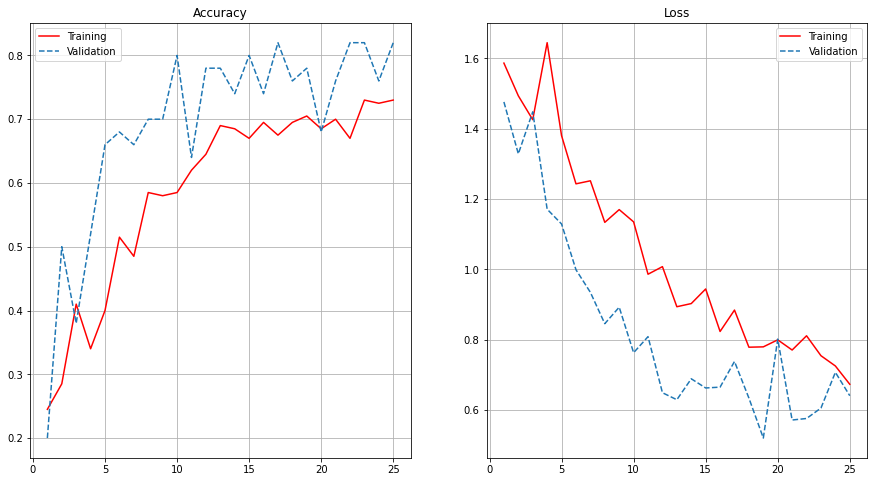

In [ ]:
get_plot(history, 25)

In [ ]:
prediction = baseline_model.predict(val_datagen)

pred = np.argmax(prediction, axis=1)

2/2 [==============================] - 0s 123ms/step


In [ ]:
predictions = baseline_model.predict(val_datagen)
preds = []

for i in predictions:
  preds.append(np.argmax(i))

2/2 [==============================] - 0s 131ms/step


In [ ]:
preds= np.asarray(preds)

In [ ]:
confusion_matrix = tf.math.confusion_matrix(
    val_datagen.classes,
    preds,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

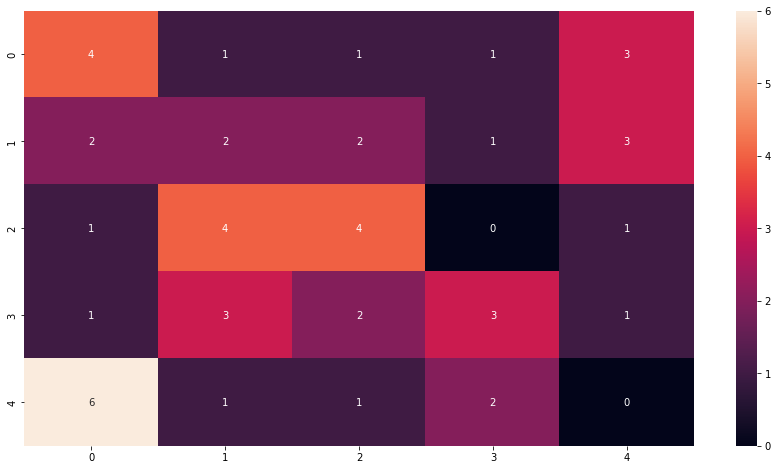

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(confusion_matrix,annot= True)
plt.show()

In [ ]:
val_datagen.class_indices

{'Cloudy': 0, 'Foggy': 1, 'Rainy': 2, 'Snowy': 3, 'Sunny': 4}

# Transfer Learning

In [ ]:
# refer -> https://www.kaggle.com/code/aaryanshsahay/transfer-learning-dl

# Squeeze Net

In [4]:
!pip install keras_squeezenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-squeezenet: filename=keras_squeezenet-0.4-py3-none-any.whl size=3589 sha256=4ef56d53c18513571ce389c3f9737136a59cb01bd4baa2d64c4f743f55cf84c8
  Stored in directory: /root/.cache/pip/wheels/3f/8d/f6/8ab612d1c02d4f3da2660139414474ef1359fd72fb61814050
Successfully built keras-squeezenet


In [6]:
from keras_squeezenet import SqueezeNet
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image

ImportError: ignored